## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!


In [14]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt



`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [27]:
df = pd.read_csv('ab_data.csv')
df


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


b. Use the below cell to find the number of rows in the dataset.

In [22]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [23]:
# exclusive or (`^`) returns `True` if one of the two conditions is `True`, but not both.
((df['group'] == "treatment") ^ (df['landing_page'] == "new_page")).sum()

3893

In [24]:
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [25]:
# exclusive or (`^`) returns `True` if one of the two conditions is `True`, but not both.
((df['group'] == "treatment") ^ (df['landing_page'] == "new_page")).sum()

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [42]:
# get indices where group does correctly align with landing_page
df2_idx = ((df['group'] == "control") ^ (df['landing_page'] == "old_page")) | \
          ((df['group'] == "treatment") ^ (df['landing_page'] == "new_page"))

# filter the dataframe by the filter indices
df2 = df.loc[df2_idx]
df2.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


In [38]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [44]:
df2['user_id'].nunique()

3893

b. There is one **user_id** repeated in **df2**.  What is it?

In [45]:
df2.loc[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted


c. What is the row information for the repeat **user_id**? 

In [46]:
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [47]:
df2 = df2.loc[~df2['user_id'].duplicated()]

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [48]:
df2['converted'].mean()

0.12432571281787824

b. Given that an individual was in the `control` group, what is the probability they converted?

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [15]:
df2.groupby('group')['converted'].mean()

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

d. What is the probability that an individual received the new page?

In [16]:
(df2['landing_page'] == "new_page").mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

> The exposure to new and old pages is equal (50% chance of landing on either) which indicated fairness. Since the treatment page actually lead to a (minor) decrement in the conversion rate, the data does not support the hypothesis that new treatment leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$ H_0: p_{new} \leq p_{old} $$
$$ H_1: p_{new} > p_{old} $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [17]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [18]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [19]:
n_new = (df2['landing_page'] == "new_page").sum()
n_new

145310

d. What is $n_{old}$?

In [20]:
n_old = (df2['landing_page'] == "old_page").sum()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [21]:
new_page_converted = np.random.binomial(1, p=p_new, size=n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [22]:
old_page_converted = np.random.binomial(1, p=p_old, size=n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [23]:
new_page_converted.mean() - old_page_converted.mean()

-0.0022804150655786476

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [24]:
p_diffs = (np.random.binomial(1, p_new, (10000, n_new))).mean(axis=1) - \
          (np.random.binomial(1, p_old, (10000, n_old))).mean(axis=1)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

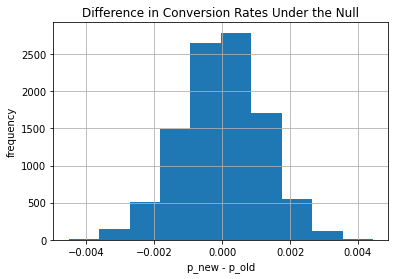

In [25]:
plt.hist(p_diffs)
plt.grid('minor')
plt.xlabel('p_new - p_old')
plt.ylabel('frequency')
plt.title('Difference in Conversion Rates Under the Null');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [26]:
# actual observed conversion difference
obs_diff = df2.groupby('landing_page')['converted'].mean().new_page - \
           df2.groupby('landing_page')['converted'].mean().old_page
obs_diff

-0.0015782389853555567

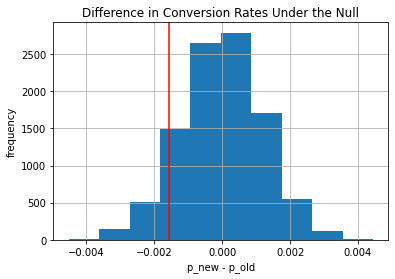

In [27]:
# update the histogram with the observed difference
plt.hist(p_diffs)
plt.grid('minor')
plt.xlabel('p_new - p_old')
plt.ylabel('frequency')
plt.title('Difference in Conversion Rates Under the Null')
plt.axvline(obs_diff, color='red');

In [28]:
# p_value calculation
p_val = (p_diffs > obs_diff).mean()
p_val

0.903

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> The calculated value is called **p-value**, it represents the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.
In this scenario it indicates the probability of observing facts about the new page having higher conversion probability, provided an initial hypothesis of no difference between the conversion rates of both pages.

> Since this value is greater than \\(\alpha\\) (Type I error), it shows that the data does not provide enough evidence to reject the null. Thus we fail to reject the null hypothesis, which means we are unable to reject the assumption that both pages have similar conversion rates.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
# Number of converted users for each page
df2.groupby('landing_page')['converted'].sum()

landing_page
new_page    17264
old_page    17489
Name: converted, dtype: int64

In [30]:
# Number of users of each page
df2['landing_page'].value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [31]:
import statsmodels.api as sm

convert_old = 17489
convert_new = 17264
n_old = 145274
n_new = 145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

> **z-score:** according to [this table](https://www.statisticshowto.com/wp-content/uploads/2014/11/z-alpha.png), an \\(\alpha\\) of 5% equates to a z-score of 1.96. The z-score from our sample (1.31) is lower than 1.96, therefore we fail to reject the null.    
> **p-value:** the p-value is closely matching to the one calculated earlier in part **j.**, and since this value is greater than \\(\alpha\\), we fail to reject the null.    
> The **z-score**, and both **p_values** lead to the same conclusion: **the conversion rates for the new page do not differ from the old page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
# Copy the filtered dataframe into a new frame
df3 = df2.copy()

# Add an intercept column 
df3['intercept'] = 1

# Add ab_page column where treatment == 1
df3['ab_page'] = (df3['group'] == 'treatment').astype(int)

df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
log_model = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290584
Method:                           MLE   Df Model:                           -1
Date:                Wed, 13 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        23:15:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

> p_value = `0.190`

> * The null hypothesis of the logistic regression is that the independant variable's slope is equal to zero (i.e. `ab_page` has no effect on `converted`), which is different from the null hypothesis in **Part II**, comparing the effect of landing on new vs old pages.
> * The null hypothesis in **Part III** is \\(H_0: beta = 0\\), while that of **Part II** is \\(H_0: p_{new} \leq p_{old}\\). A null hypothesis with an *equal* sign is a two-tailed, which differs from a null hypothesis with a *smaller than (or greater than)* sign, this one is a one-tailed hypothesis

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> Considering other factors provides more insight into actual factors that might affect the conversion rates.

> Additional terms (squared terms, cubic terms, etc.) complicate the interpretation of the regression coefficients.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [37]:
# add dummy variables for country
df_new = df_new.join(pd.get_dummies(df_new['country']))

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [38]:
logistic_model_2 = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
logistic_model_2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Jan 2021   Pseudo R-squ.:               1.521e-05
Time:                        23:15:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [39]:
# Actual country coefficients
coef_CA = np.exp(-0.0408)
coef_UK = np.exp(0.0099)

coef_CA, coef_UK

(0.9600211149716509, 1.0099491671175422)

> The two multiplicative values above are close to 1, which indicate that - holding other factors constant - a person from CA or UK has an almost 1:1 ratio of converting compared to US. This indicates that the 3 countries have similar rates of conversion.   
> Therefore it can be concluded that **the country does not impace the conversion rate.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
df4 = df_new.copy()

df4['page_CA'] = df4['ab_page'] * df4['CA']
df4['page_UK'] = df4['ab_page'] * df4['UK']
df4['page_US'] = df4['ab_page'] * df4['US']

df4.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,page_CA,page_UK,page_US
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [41]:
sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'CA', 'UK', 'page_CA', 'page_UK']]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Jan 2021   Pseudo R-squ.:               3.482e-05
Time:                        23:15:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
page_CA       -0.0469      0.054     -0.872      0.383      -0.152       0.059
page_UK        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

> The p-values and factor coefficients show no substantial effect of any of the model factors on the conversion rates.

## Overall Conclusion

### Summary
The analysis above aimed to test if the implementation of a new landing page would increase the rate of conversion of the users. The analysis also tested, using regression models, the effects of landing on either page (old or new) and the country of the user on the conversion rates.

### Findings
The analysis concluded that, based on the evidence from the provided dataset, the new page does not provide significant improvement in the conversion rates over the the old page. Moreover, the analysis failed to provide any evidence on a correlation between the country of the user and the conversion rate, as well as failing to provide evidence on a correlation between the page version (old/new) and the conversion rate.

### Practical Takeaways
Given the aforementioned findings, it is of negligible benefit to invest in deployment of the new page.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.